# Chest X-Ray Disease Detection and Performance Analysis
This experiment compares the detection and performance of 5 Convolutional Neural Networks being:
* EfficientNetB7
* ResNet152V2
* VGG16
* Xception
* MobileNetV2

Defining Parameters for Models

In [14]:
BATCH_SIZE = 5
EPOCHS = 10
DATASIZE_PER_LABEL = 1300

Importing all the required Modules

In [15]:
import os
import pandas as pd
from glob import glob
import sklearn
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt

# Data Pre-Processing

Getting all image paths

In [16]:
COVID_IMG_PATHS = {os.path.basename(x): x for x in glob('C:/Users/talha/Desktop/Progaming/CSS2_Project/COVID-19_Radiography_Dataset/COVID/*.png', recursive=True)}
LUNG_OPACITY_IMG_PATHS = {os.path.basename(x): x for x in glob('C:/Users/talha/Desktop/Progaming/CSS2_Project/COVID-19_Radiography_Dataset/Lung_Opacity/*.png', recursive=True)}
PNEUMONIA_IMG_PATHS = {os.path.basename(x): x for x in glob('C:/Users/talha/Desktop/Progaming/CSS2_Project/COVID-19_Radiography_Dataset/Pneumonia/*.png', recursive=True)}
NORMAL_IMG_PATHS = {os.path.basename(x): x for x in glob('C:/Users/talha/Desktop/Progaming/CSS2_Project/COVID-19_Radiography_Dataset/Normal/*.png', recursive=True)}

Creating a dataframe containing label and path of image

In [17]:
data = []
for label, path in COVID_IMG_PATHS.items():
    data.append(('Covid', path))
    
for label, path in LUNG_OPACITY_IMG_PATHS.items():
    data.append(('Lung_Opacity', path))

for label, path in PNEUMONIA_IMG_PATHS.items():
    data.append(('Pneumonia', path))
    
for label, path in NORMAL_IMG_PATHS.items():
    data.append(('Normal', path))


df = pd.DataFrame(data, columns=['Label', 'Path'])

Getting a equal amount of data per label corresponding to the earlier defined: DATASIZE_PER_LABEL.

In [18]:
df1 = df[df['Label'] == 'Covid'].sample(DATASIZE_PER_LABEL)
df2 = df[df['Label'] == 'Lung_Opacity'].sample(DATASIZE_PER_LABEL)
df3 = df[df['Label'] == 'Pneumonia'].sample(DATASIZE_PER_LABEL)
df4 = df[df['Label'] == 'Normal'].sample(DATASIZE_PER_LABEL)

Combining the seperate datasets into 1 dataset

In [19]:
FINAL_DATAFRAME = pd.concat([df1, df2, df3, df4], ignore_index=True)
FINAL_DATAFRAME.reset_index(drop=True, inplace=True)

Shuffling the dataset

In [20]:
FINAL_DATAFRAME = sklearn.utils.shuffle(FINAL_DATAFRAME)

Oberserving the first 10 samples of the dataset

In [21]:
FINAL_DATAFRAME.head(10)

,Label,Path
4146,Normal,C:/Users/talha/Desktop/Progaming/CSS2_Project/...
2543,Lung_Opacity,C:/Users/talha/Desktop/Progaming/CSS2_Project/...
2533,Lung_Opacity,C:/Users/talha/Desktop/Progaming/CSS2_Project/...
1513,Lung_Opacity,C:/Users/talha/Desktop/Progaming/CSS2_Project/...
4535,Normal,C:/Users/talha/Desktop/Progaming/CSS2_Project/...
2256,Lung_Opacity,C:/Users/talha/Desktop/Progaming/CSS2_Project/...
3396,Pneumonia,C:/Users/talha/Desktop/Progaming/CSS2_Project/...
2360,Lung_Opacity,C:/Users/talha/Desktop/Progaming/CSS2_Project/...
486,Covid,C:/Users/talha/Desktop/Progaming/CSS2_Project/...
3530,Pneumonia,C:/Users/talha/Desktop/Progaming/CSS2_Project/...


Observing if the datasets were evenly split

In [22]:
value_counts = FINAL_DATAFRAME['Label'].value_counts()
print(value_counts)

Label
Normal          1300
Lung_Opacity    1300
Pneumonia       1300
Covid           1300
Name: count, dtype: int64


# Creating the Data Generators

Defining the datagen and training and validation split. Which is 80% training and 20% validation.

In [23]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

Defining the training and validation generators

In [24]:
# Generate training dataset
train_generator = datagen.flow_from_dataframe(
    dataframe=FINAL_DATAFRAME,
    x_col='Path',
    y_col='Label', 
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset='training',
    shuffle=True
)

# Generate validation dataset
validation_generator = datagen.flow_from_dataframe(
    dataframe=FINAL_DATAFRAME,
    x_col='Path',
    y_col='Label',
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset='validation',
    shuffle=True
)

Found 4160 validated image filenames belonging to 4 classes.
Found 1040 validated image filenames belonging to 4 classes.


# EfficientNetB7

Model Architecture

In [25]:
model_EfficientNetB7 = tf.keras.models.Sequential()

model_EfficientNetB7.add(tf.keras.layers.Input(shape = (224, 224, 3)))
model_EfficientNetB7.add(tf.keras.applications.EfficientNetB7(input_shape=(224, 224, 3), include_top=False, weights='imagenet'))
model_EfficientNetB7.add(tf.keras.layers.GlobalAveragePooling2D())
model_EfficientNetB7.add(tf.keras.layers.Dense(128, activation='relu'))
model_EfficientNetB7.add(tf.keras.layers.Dense(64, activation='relu'))
model_EfficientNetB7.add(tf.keras.layers.Dense(4, activation='softmax'))

model_EfficientNetB7.compile(tf.keras.optimizers.Adam(learning_rate=0.00001), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')])
model_EfficientNetB7.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb7 (Functional)  (None, 7, 7, 2560)       64097687  
                                                                 
 global_average_pooling2d_1   (None, 2560)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 128)               327808    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 4)                 260       
                                                                 
Total params: 64,434,011
Trainable params: 64,123,284
Non-trainable params: 310,727
____________________________________

Training the Model

In [26]:
history_EfficientNetB7 = model_EfficientNetB7.fit(train_generator, epochs=EPOCHS, validation_data=validation_generator)

Epoch 1/10
832/832 [==============================] - 190s 197ms/step - loss: 0.9165 - accuracy: 0.6524 - precision: 0.8458 - recall: 0.3613 - val_loss: 1.1287 - val_accuracy: 0.5663 - val_precision: 0.9236 - val_recall: 0.1394
Epoch 2/10
832/832 [==============================] - 162s 195ms/step - loss: 0.4872 - accuracy: 0.8296 - precision: 0.8664 - recall: 0.7779 - val_loss: 0.4162 - val_accuracy: 0.8904 - val_precision: 0.9362 - val_recall: 0.7904
Epoch 3/10
832/832 [==============================] - 165s 198ms/step - loss: 0.3443 - accuracy: 0.8760 - precision: 0.8994 - recall: 0.8536 - val_loss: 0.8855 - val_accuracy: 0.6087 - val_precision: 0.7863 - val_recall: 0.4740
Epoch 4/10
832/832 [==============================] - 166s 200ms/step - loss: 0.2796 - accuracy: 0.9005 - precision: 0.9176 - recall: 0.8861 - val_loss: 0.6149 - val_accuracy: 0.7327 - val_precision: 0.8361 - val_recall: 0.6327
Epoch 5/10
832/832 [==============================] - 160s 192ms/step - loss: 0.2185 - a

Model Evaluation

In [27]:
eval_EfficientNetB7  = model_EfficientNetB7.evaluate(validation_generator)

208/208 [==============================] - 9s 45ms/step - loss: 0.3875 - accuracy: 0.8538 - precision: 0.8731 - recall: 0.8269


Model History

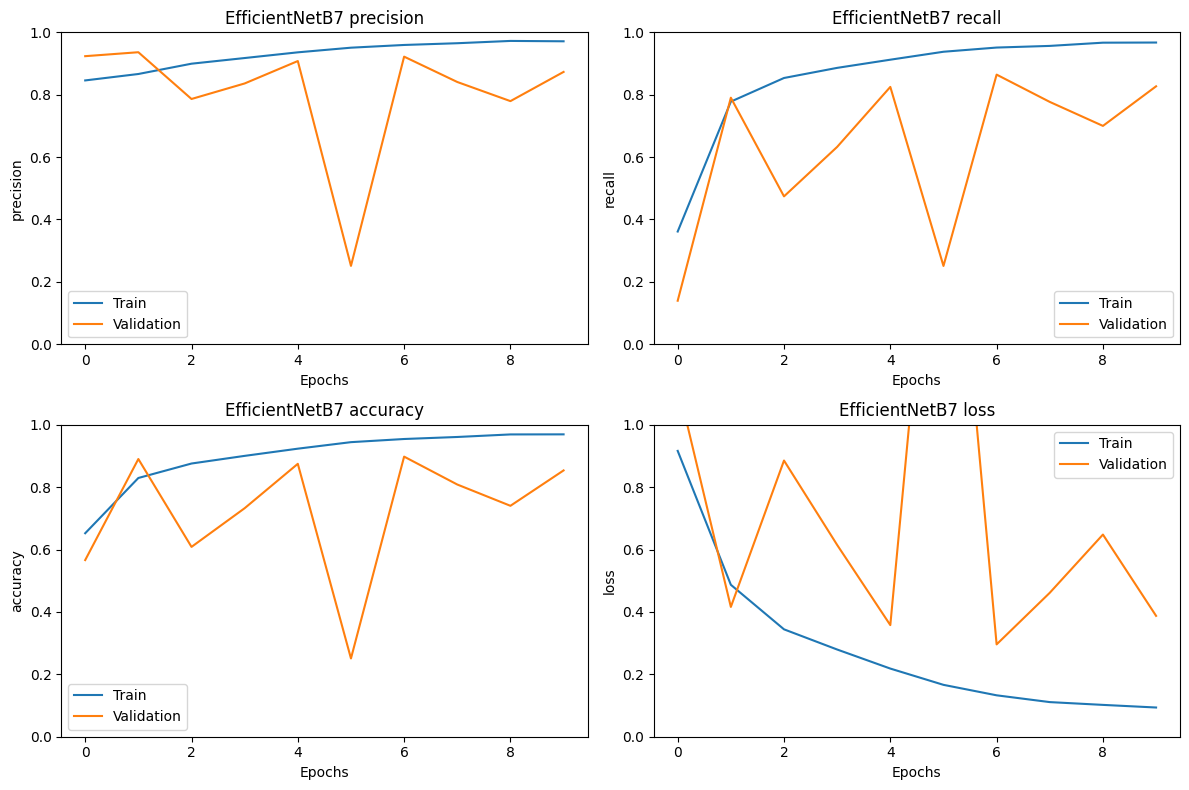

In [49]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
ax = ax.ravel()

metrics = ['precision', 'recall', 'accuracy', 'loss']
for i, metric in enumerate(metrics):
    ax[i].plot(history_EfficientNetB7.history[metric])
    ax[i].plot(history_EfficientNetB7.history['val_' + metric])
    ax[i].set_title(f"EfficientNetB7 {metric}")
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(['Train', 'Validation'])
    ax[i].set_ylim([0, 1])

plt.tight_layout()
plt.show()

# ResNet152V2

Model Architecture

In [29]:
model_ResNet152V2 = tf.keras.models.Sequential()

model_ResNet152V2.add(tf.keras.layers.Input(shape = (224, 224, 3)))
model_ResNet152V2.add(tf.keras.applications.ResNet152V2(input_shape=(224, 224, 3), include_top=False, weights='imagenet'))
model_ResNet152V2.add(tf.keras.layers.GlobalAveragePooling2D())
model_ResNet152V2.add(tf.keras.layers.Dense(128, activation='relu'))
model_ResNet152V2.add(tf.keras.layers.Dense(64, activation='relu'))
model_ResNet152V2.add(tf.keras.layers.Dense(4, activation='softmax'))

model_ResNet152V2.compile(tf.keras.optimizers.Adam(learning_rate=0.00001), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')])
model_ResNet152V2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 128)               262272    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 4)                 260       
                                                                 
Total params: 58,602,436
Trainable params: 58,458,692
Non-trainable params: 143,744
____________________________________

Training the Model

In [30]:
history_ResNet152V2 = model_ResNet152V2.fit(train_generator, epochs=EPOCHS, validation_data=validation_generator)

Epoch 1/10
832/832 [==============================] - 102s 105ms/step - loss: 0.8447 - accuracy: 0.6603 - precision: 0.8331 - recall: 0.4536 - val_loss: 0.5411 - val_accuracy: 0.8048 - val_precision: 0.8448 - val_recall: 0.7433
Epoch 2/10
832/832 [==============================] - 85s 102ms/step - loss: 0.3937 - accuracy: 0.8601 - precision: 0.8891 - recall: 0.8291 - val_loss: 0.2616 - val_accuracy: 0.9173 - val_precision: 0.9291 - val_recall: 0.8952
Epoch 3/10
832/832 [==============================] - 85s 103ms/step - loss: 0.2316 - accuracy: 0.9221 - precision: 0.9354 - recall: 0.9084 - val_loss: 0.2709 - val_accuracy: 0.9067 - val_precision: 0.9221 - val_recall: 0.8875
Epoch 4/10
832/832 [==============================] - 85s 102ms/step - loss: 0.1390 - accuracy: 0.9579 - precision: 0.9626 - recall: 0.9534 - val_loss: 0.3169 - val_accuracy: 0.8904 - val_precision: 0.8994 - val_recall: 0.8856
Epoch 5/10
832/832 [==============================] - 85s 102ms/step - loss: 0.0864 - accur

Model Evaluation

In [31]:
eval_ResNet152V2 = model_ResNet152V2.evaluate(validation_generator)

208/208 [==============================] - 7s 33ms/step - loss: 0.2051 - accuracy: 0.9442 - precision: 0.9441 - recall: 0.9423


Model History

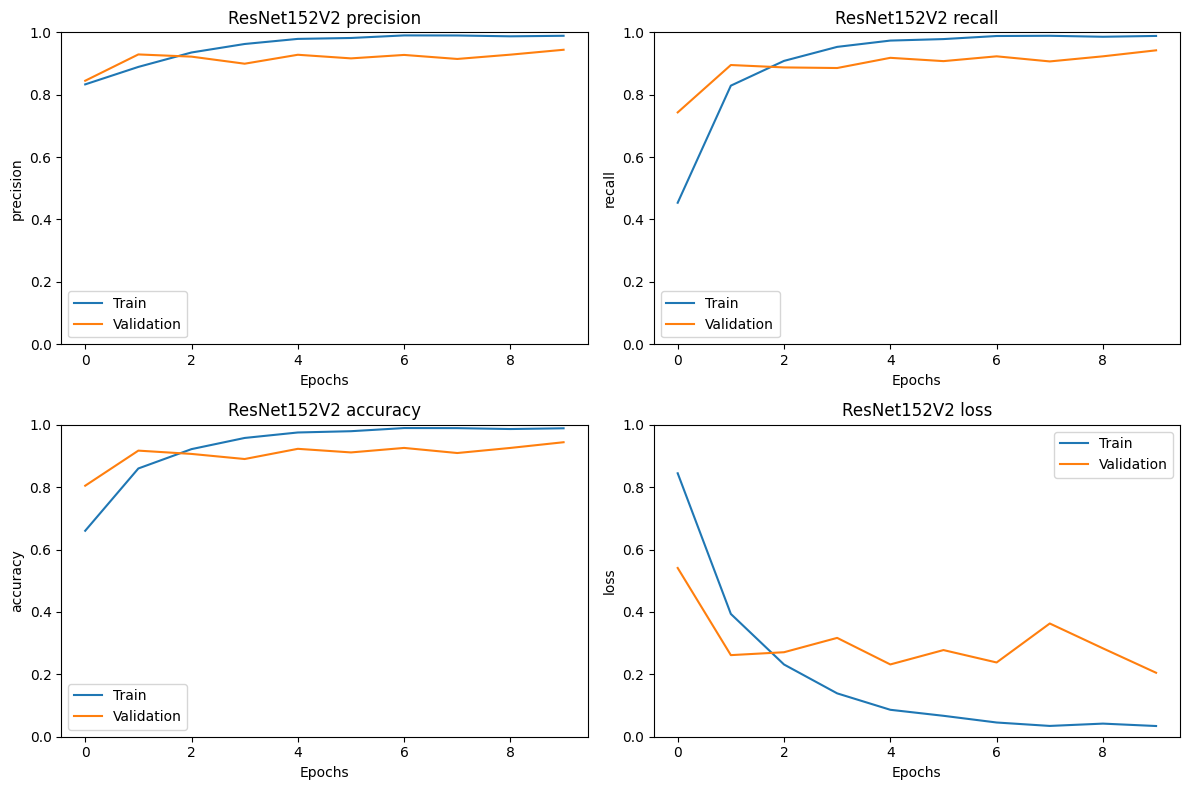

In [50]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
ax = ax.ravel()

metrics = ['precision', 'recall', 'accuracy', 'loss']
for i, metric in enumerate(metrics):
    ax[i].plot(history_ResNet152V2.history[metric])
    ax[i].plot(history_ResNet152V2.history['val_' + metric])
    ax[i].set_title(f"ResNet152V2 {metric}")
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(['Train', 'Validation'])
    ax[i].set_ylim([0, 1])

plt.tight_layout()
plt.show()

# VGG16

Model Architecture

In [33]:
model_VGG16 = tf.keras.models.Sequential()

model_VGG16.add(tf.keras.layers.Input(shape = (224, 224, 3)))
model_VGG16.add(tf.keras.applications.VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet'))
model_VGG16.add(tf.keras.layers.GlobalAveragePooling2D())
model_VGG16.add(tf.keras.layers.Dense(128, activation='relu'))
model_VGG16.add(tf.keras.layers.Dense(64, activation='relu'))
model_VGG16.add(tf.keras.layers.Dense(4, activation='softmax'))

model_VGG16.compile(tf.keras.optimizers.Adam(learning_rate=0.00001), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')])
model_VGG16.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_3   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_9 (Dense)             (None, 128)               65664     
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 4)                 260       
                                                                 
Total params: 14,788,868
Trainable params: 14,788,868
Non-trainable params: 0
__________________________________________

Training the Model

In [34]:
history_VGG16 = model_VGG16.fit(train_generator, epochs=EPOCHS, validation_data=validation_generator)

Epoch 1/10
832/832 [==============================] - 56s 63ms/step - loss: 0.6028 - accuracy: 0.7683 - precision: 0.8391 - recall: 0.6784 - val_loss: 0.4909 - val_accuracy: 0.7798 - val_precision: 0.7946 - val_recall: 0.7702
Epoch 2/10
832/832 [==============================] - 52s 62ms/step - loss: 0.2988 - accuracy: 0.8925 - precision: 0.9046 - recall: 0.8817 - val_loss: 0.2221 - val_accuracy: 0.9317 - val_precision: 0.9392 - val_recall: 0.9202
Epoch 3/10
832/832 [==============================] - 52s 62ms/step - loss: 0.2315 - accuracy: 0.9130 - precision: 0.9204 - recall: 0.9067 - val_loss: 0.1745 - val_accuracy: 0.9337 - val_precision: 0.9379 - val_recall: 0.9298
Epoch 4/10
832/832 [==============================] - 52s 62ms/step - loss: 0.1898 - accuracy: 0.9339 - precision: 0.9385 - recall: 0.9281 - val_loss: 0.1785 - val_accuracy: 0.9308 - val_precision: 0.9349 - val_recall: 0.9250
Epoch 5/10
832/832 [==============================] - 52s 62ms/step - loss: 0.1538 - accuracy: 0

Model Evaluation

In [35]:
eval_VGG16 = model_VGG16.evaluate(validation_generator)

208/208 [==============================] - 4s 19ms/step - loss: 0.1555 - accuracy: 0.9481 - precision: 0.9488 - recall: 0.9452


Model History

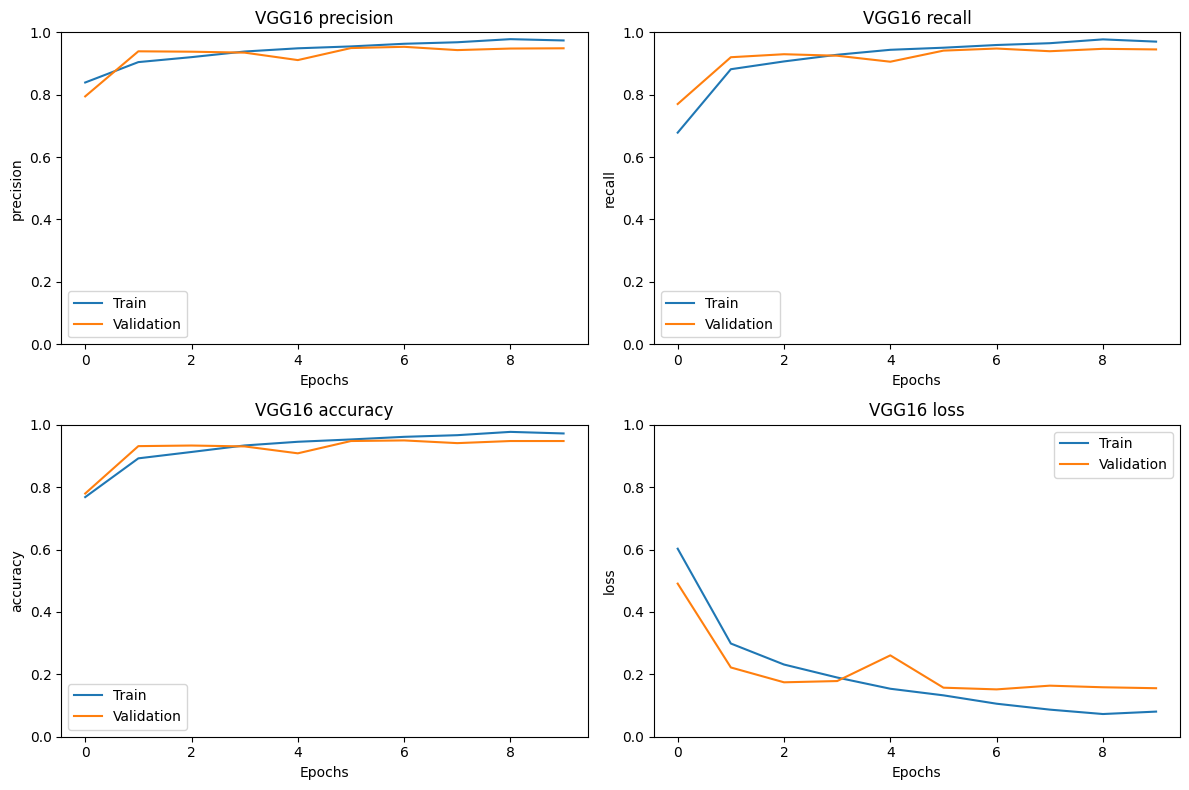

In [51]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
ax = ax.ravel()

metrics = ['precision', 'recall', 'accuracy', 'loss']
for i, metric in enumerate(metrics):
    ax[i].plot(history_VGG16.history[metric])
    ax[i].plot(history_VGG16.history['val_' + metric])
    ax[i].set_title(f"VGG16 {metric}")
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(['Train', 'Validation'])
    ax[i].set_ylim([0, 1])

plt.tight_layout()
plt.show()

# Xception

Model Architecture

In [37]:
model_Xception = tf.keras.models.Sequential()

model_Xception.add(tf.keras.layers.Input(shape = (224, 224, 3)))
model_Xception.add(tf.keras.applications.Xception(input_shape=(224, 224, 3), include_top=False, weights='imagenet'))
model_Xception.add(tf.keras.layers.GlobalAveragePooling2D())
model_Xception.add(tf.keras.layers.Dense(128, activation='relu'))
model_Xception.add(tf.keras.layers.Dense(64, activation='relu'))
model_Xception.add(tf.keras.layers.Dense(4, activation='softmax'))

model_Xception.compile(tf.keras.optimizers.Adam(learning_rate=0.00001), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')])
model_Xception.summary()

83683744/83683744 [==============================] - 14s 0us/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d_4   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_12 (Dense)            (None, 128)               262272    
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 4)                 260       
                                                                 
Total params: 21,132,268
Trainable params: 21,077,740


Training the Model

In [38]:
history_Xception = model_Xception.fit(train_generator, epochs=EPOCHS, validation_data=validation_generator)

Epoch 1/10
832/832 [==============================] - 48s 52ms/step - loss: 1.0068 - accuracy: 0.5971 - precision: 0.8574 - recall: 0.2964 - val_loss: 0.5114 - val_accuracy: 0.8346 - val_precision: 0.8809 - val_recall: 0.7538
Epoch 2/10
832/832 [==============================] - 42s 51ms/step - loss: 0.5425 - accuracy: 0.8082 - precision: 0.8575 - recall: 0.7361 - val_loss: 0.3119 - val_accuracy: 0.8962 - val_precision: 0.9198 - val_recall: 0.8712
Epoch 3/10
832/832 [==============================] - 42s 51ms/step - loss: 0.3811 - accuracy: 0.8639 - precision: 0.8905 - recall: 0.8370 - val_loss: 0.2720 - val_accuracy: 0.9144 - val_precision: 0.9269 - val_recall: 0.8894
Epoch 4/10
832/832 [==============================] - 42s 51ms/step - loss: 0.2887 - accuracy: 0.9002 - precision: 0.9201 - recall: 0.8805 - val_loss: 0.2503 - val_accuracy: 0.9144 - val_precision: 0.9274 - val_recall: 0.9087
Epoch 5/10
832/832 [==============================] - 43s 51ms/step - loss: 0.2387 - accuracy: 0

Model Evaluation

In [39]:
eval_Xception = model_Xception.evaluate(validation_generator)

208/208 [==============================] - 3s 15ms/step - loss: 0.2131 - accuracy: 0.9356 - precision: 0.9373 - recall: 0.9337


Model History

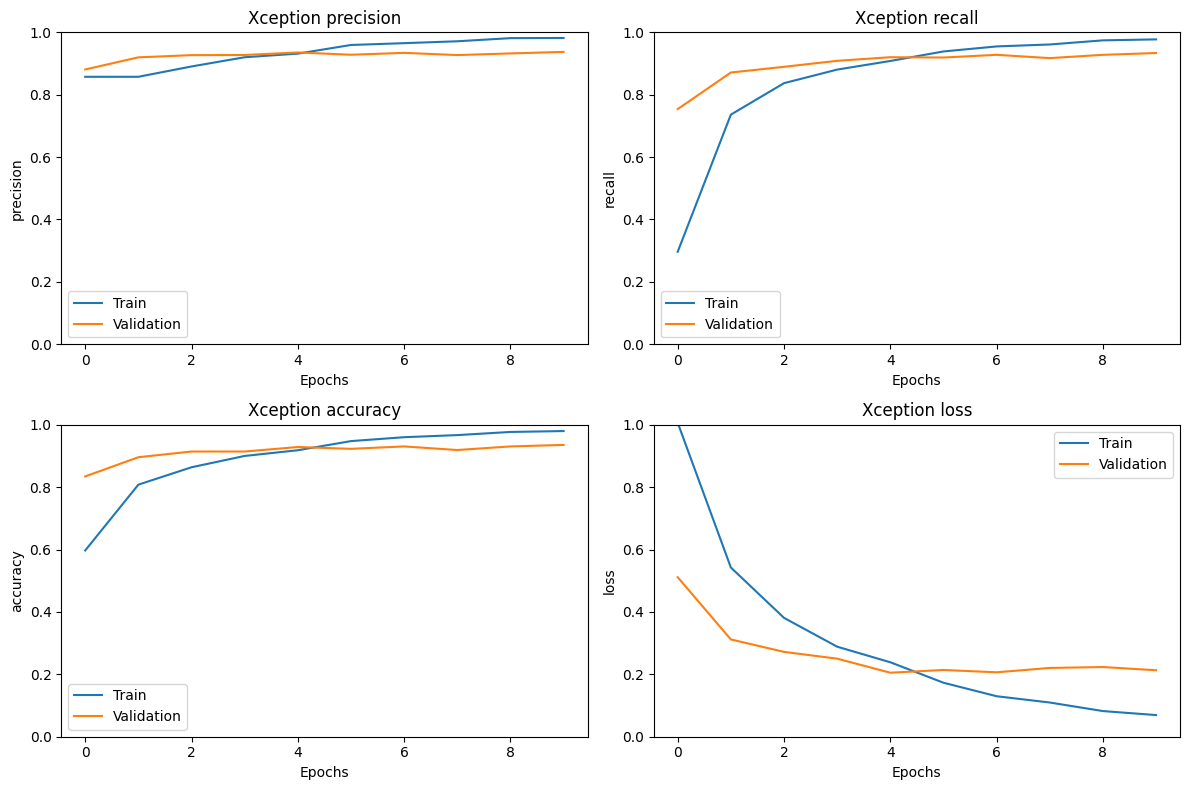

In [55]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
ax = ax.ravel()

metrics = ['precision', 'recall', 'accuracy', 'loss']
for i, metric in enumerate(metrics):
    ax[i].plot(history_Xception.history[metric])
    ax[i].plot(history_Xception.history['val_' + metric])
    ax[i].set_title(f"Xception {metric}")
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(['Train', 'Validation'])
    ax[i].set_ylim([0, 1])

plt.tight_layout()
plt.show()

# MobileNetV2

Model Architecture

In [41]:
model_MobileNetV2 = tf.keras.models.Sequential()

model_MobileNetV2.add(tf.keras.layers.Input(shape = (224, 224, 3)))
model_MobileNetV2.add(tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet'))
model_MobileNetV2.add(tf.keras.layers.GlobalAveragePooling2D())
model_MobileNetV2.add(tf.keras.layers.Dense(128, activation='relu'))
model_MobileNetV2.add(tf.keras.layers.Dense(64, activation='relu'))
model_MobileNetV2.add(tf.keras.layers.Dense(4, activation='softmax'))

model_MobileNetV2.compile(tf.keras.optimizers.Adam(learning_rate=0.00001), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')])
model_MobileNetV2.summary()

9406464/9406464 [==============================] - 1s 0us/step
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_5   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_15 (Dense)            (None, 128)               163968    
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 4)                 260       
                                                         

Training the Model

In [42]:
history_MobileNetV2 = model_MobileNetV2.fit(train_generator, epochs=EPOCHS, validation_data=validation_generator)

Epoch 1/10
832/832 [==============================] - 31s 32ms/step - loss: 0.9601 - accuracy: 0.6192 - precision: 0.8224 - recall: 0.3719 - val_loss: 0.9751 - val_accuracy: 0.5846 - val_precision: 0.7421 - val_recall: 0.4067
Epoch 2/10
832/832 [==============================] - 25s 30ms/step - loss: 0.5717 - accuracy: 0.7986 - precision: 0.8489 - recall: 0.7226 - val_loss: 0.8887 - val_accuracy: 0.6240 - val_precision: 0.6508 - val_recall: 0.5663
Epoch 3/10
832/832 [==============================] - 25s 30ms/step - loss: 0.4534 - accuracy: 0.8308 - precision: 0.8664 - recall: 0.7935 - val_loss: 0.9291 - val_accuracy: 0.6423 - val_precision: 0.6592 - val_recall: 0.6250
Epoch 4/10
832/832 [==============================] - 25s 30ms/step - loss: 0.4023 - accuracy: 0.8546 - precision: 0.8836 - recall: 0.8228 - val_loss: 0.7239 - val_accuracy: 0.6990 - val_precision: 0.7337 - val_recall: 0.6808
Epoch 5/10
832/832 [==============================] - 26s 31ms/step - loss: 0.3300 - accuracy: 0

Model Evaluation

In [43]:
eval_MobileNetV2 = model_MobileNetV2.evaluate(validation_generator)

208/208 [==============================] - 3s 14ms/step - loss: 0.2002 - accuracy: 0.9433 - precision: 0.9476 - recall: 0.9394


Model History

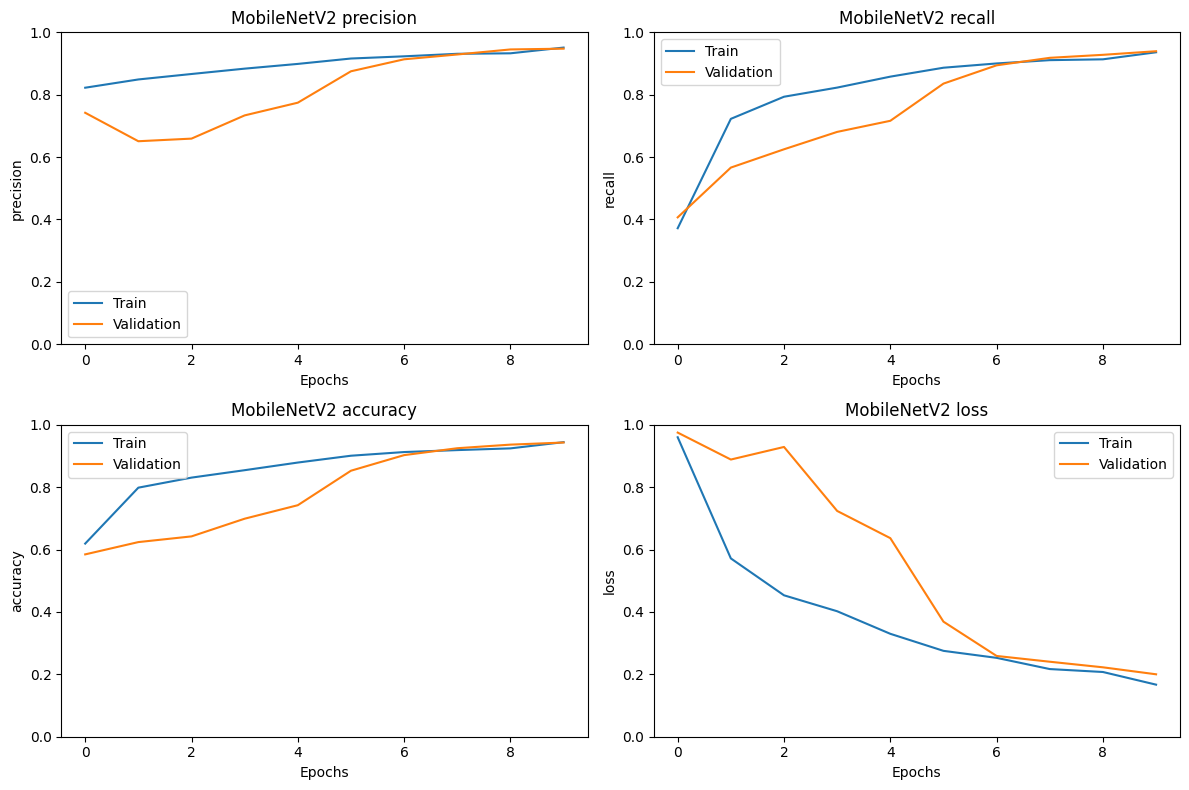

In [45]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
ax = ax.ravel()

metrics = ['precision', 'recall', 'accuracy', 'loss']
for i, metric in enumerate(metrics):
    ax[i].plot(history_MobileNetV2.history[metric])
    ax[i].plot(history_MobileNetV2.history['val_' + metric])
    ax[i].set_title(f"MobileNetV2 {metric}")
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(['Train', 'Validation'])
    ax[i].set_ylim([0, 1])

plt.tight_layout()
plt.show()

# Model Comparison

Model Metrics Comparison

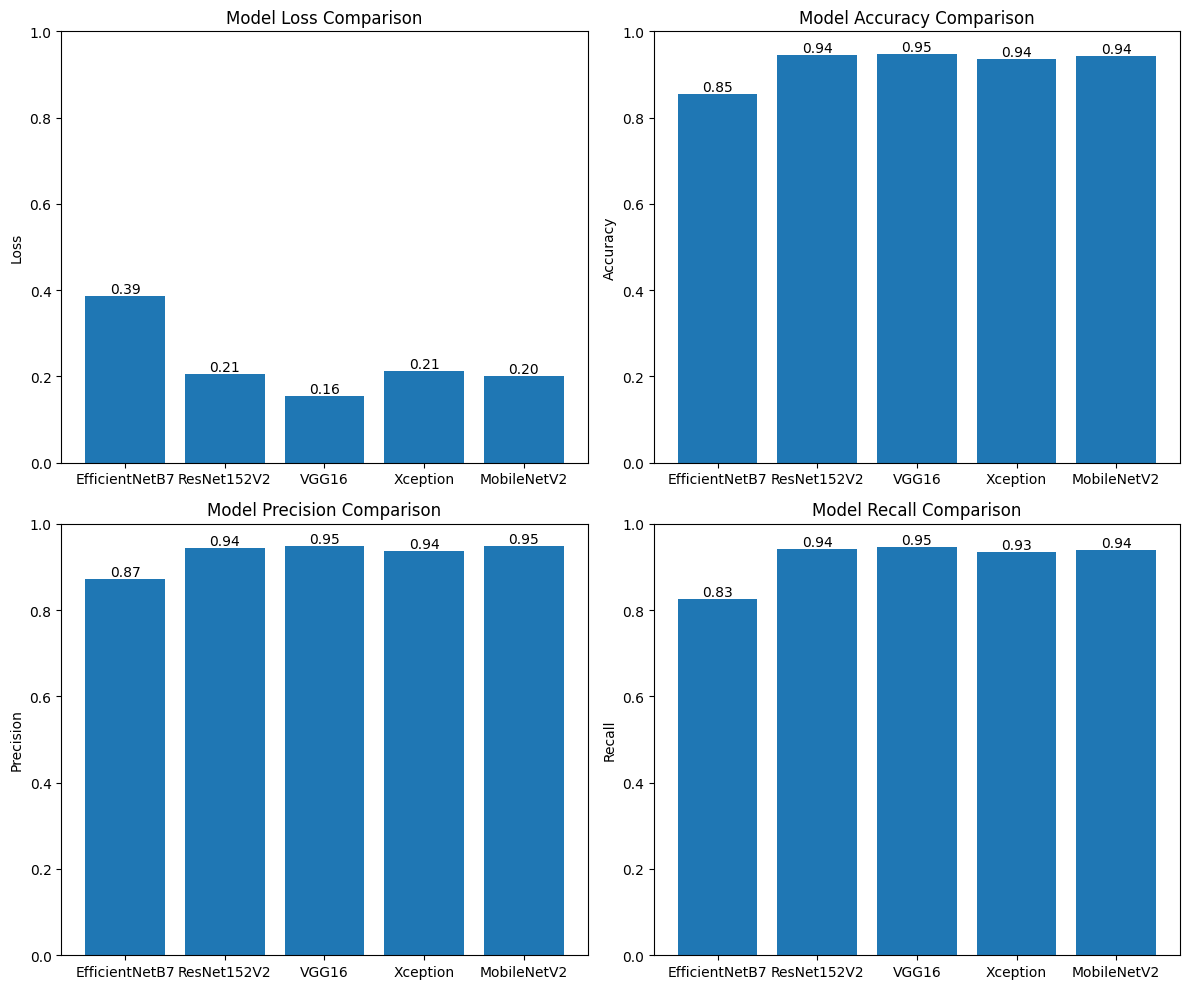

In [74]:
import matplotlib.pyplot as plt

models = ['EfficientNetB7', 'ResNet152V2', 'VGG16', 'Xception', 'MobileNetV2']
metrics = ['Loss', 'Accuracy', 'Precision', 'Recall']
values = [
    [eval_EfficientNetB7[0], eval_ResNet152V2[0], eval_VGG16[0], eval_Xception[0], eval_MobileNetV2[0]],
    [eval_EfficientNetB7[1], eval_ResNet152V2[1], eval_VGG16[1], eval_Xception[1], eval_MobileNetV2[1]],
    [eval_EfficientNetB7[2], eval_ResNet152V2[2], eval_VGG16[2], eval_Xception[2], eval_MobileNetV2[2]],
    [eval_EfficientNetB7[3], eval_ResNet152V2[3], eval_VGG16[3], eval_Xception[3], eval_MobileNetV2[3]]
]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i in range(2):
    for j in range(2):
        ax = axes[i, j]
        metric = metrics[i * 2 + j]
        
        bars = ax.bar(models, values[i * 2 + j])
        ax.set_title(f"Model {metric.capitalize()} Comparison")
        ax.set_ylabel(metric)
        ax.set_ylim([0, 1])

        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Model Training Validation History Over Epochs

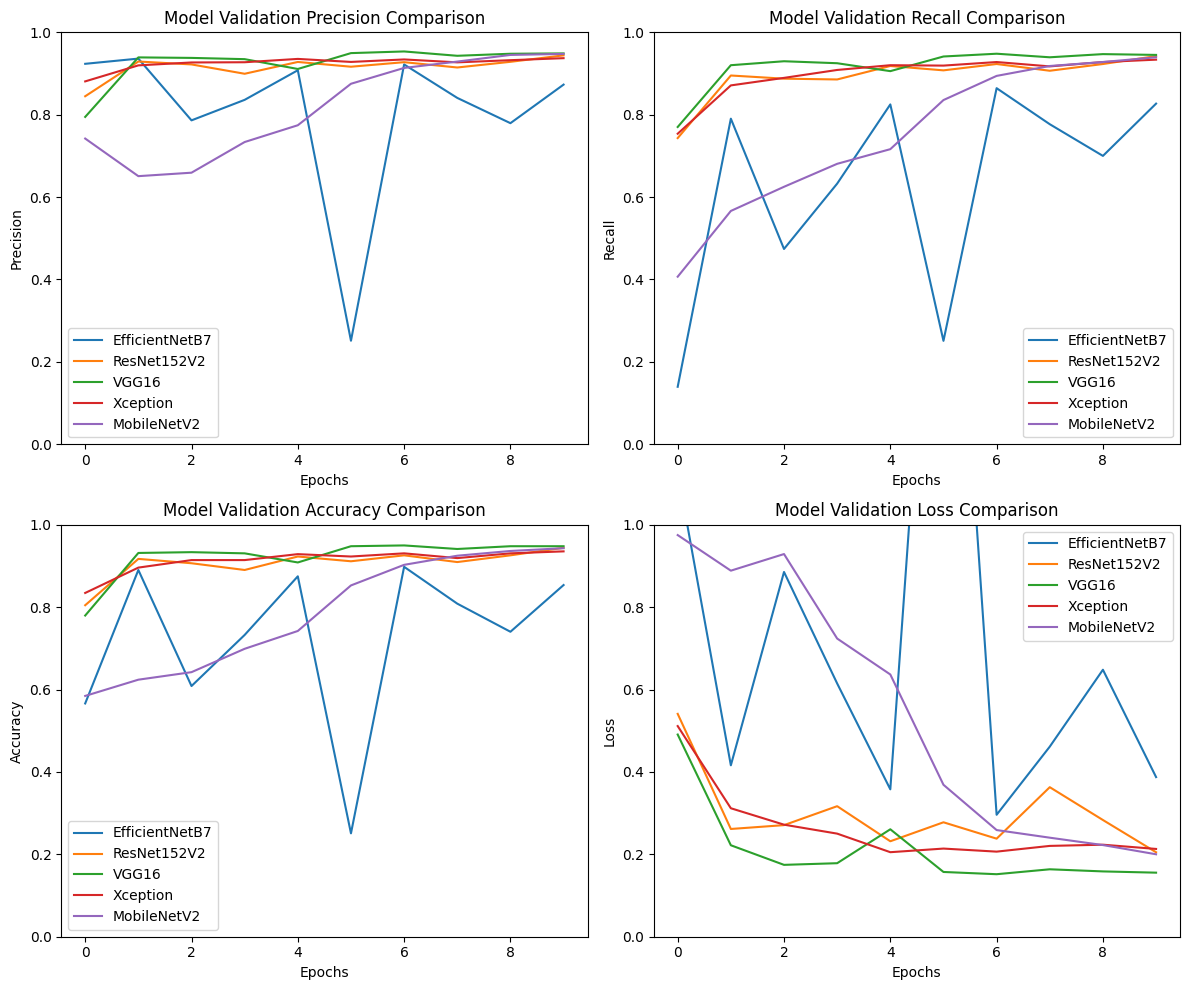

In [60]:
models = ['EfficientNetB7', 'ResNet152V2', 'VGG16', 'Xception', 'MobileNetV2']
metrics = ['precision', 'recall', 'accuracy', 'loss']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    for model in models:
        history = eval(f"history_{model}")
        ax.plot(history.history[f'val_{metric}'])
    
    ax.set_title(f"Model Validation {metric.capitalize()} Comparison")
    ax.set_xlabel("Epochs")
    ax.set_ylabel(metric.capitalize())
    ax.legend(models)
    ax.set_ylim([0, 1])

plt.tight_layout()
plt.show()